<a href="https://colab.research.google.com/github/saumyapandey1998/ai-iot-iitk/blob/master/Saumya_Pandey_linearData_sine_f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Function Approximation with a Linear Model
$y=f(x)=\sin x$ <br />
Approximate this function with a linear function of the form <br />
$y = w_0 + w_1 x + w_2 x^2$ <br />
in the range $x\in(0,2\pi)$

In [0]:
import numpy as np


### Generate data

In [0]:
def fx(x):
    '''
    Input:
        x: float (scalar) or np array
    Output:
        y: float (scalar) or np array; y=f(x)=sin(x)
        
    HINT: Use web search on how to take sine in numpy
    '''
    # YOUR CODE HERE
    y = np.sin(x)
    return y

In [11]:
'''Testing'''
def test_fx():
    assert fx(0)==0
    assert np.isclose(fx(np.pi/2), 1, atol=0.001)
    assert np.isclose(fx(np.pi/4), 0.707, atol=0.001)
    print('Test passed', '\U0001F44D')
test_fx()

Test passed 👍


In [0]:
def generateX_fx(N):
    '''
    Generate N random points in the range (0,1)
    Input:
        N: int
    Outputs:
        x: np vector of shape (N,)
        y: np vector of shape (N,); y=f(x)
    '''
    # YOUR CODE HERE
    x = np.random.random(N)* 2*(np.pi)
    yd = fx(x)
    
    return x, yd

In [13]:
generateX_fx(10)

(array([1.1665525 , 0.73968003, 3.94677098, 1.2493476 , 5.9698481 ,
        0.55741388, 1.15502156, 4.3224798 , 5.66147721, 4.26251102]),
 array([ 0.91940008,  0.67405159, -0.72095423,  0.9487787 , -0.30823506,
         0.52899332,  0.91480367, -0.92494358, -0.58242449, -0.90050018]))

In [14]:
'''Testing'''
def test_generateX_fx():
    x, yd = generateX_fx(20)
    assert x.shape[0]==20
    assert yd.shape[0]==20
    print('Test passed', '\U0001F44D')
test_generateX_fx()

Test passed 👍


### Plotting

In [0]:
def plotdata():
    x, yd = generateX_fx(20)
    import matplotlib.pyplot as plt
    i = x.argsort()
    plt.plot(x[i],yd[i])
    plt.ylabel('f(x)')
    plt.xlabel('x')
# plotdata()

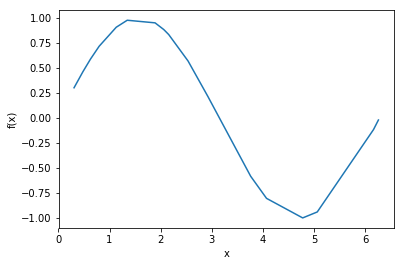

In [16]:
plotdata()

## Training
We will now define a linear model to estimate the above function, and train it with all the data

### Define model
$y = \sum_{d=0}^D w_d x^d$, here, $D$ is the degree of the model, say D=2 <br />

In matrix representation: y = Aw <br/>

In [0]:
def createA(x, D):
    '''
    Create the matrix A with degree D
    Input:
        x: np vector of shape (N,)
        D: degree of the model
    Output:
        A: np matrix of shape (N,D+1)
    '''
    # YOUR CODE HERE
    a = len(x)
    A = np.ones((a,D+1))
    
    
    
    for i in range(0,a):
      for j in range (0,D+1):
        A[i][j] = np.power(x[i],j) 
    
    return(A) 
    
        
        
    
      

In [0]:
x = np.array([1,2,3])
A=createA(x,2)


In [19]:
'''Testing'''
def test_createA():
    x = np.array([1,2,3])
    A = createA(x, 2)
    assert A.shape==(3,3)
    assert np.all(A[0,:]==1)
    assert np.all(A==np.array([[1.0, 1.0, 1.0], [1.0, 2.0, 4.0], [1.0, 3.0, 9.0]]))
    print('Test passed', '\U0001F44D')
test_createA()

Test passed 👍


### Estimate Weights
Estimate w from yd and A. Use the least square solution you learnt in the video

In [0]:
def train_w(A, yd):
    '''
    Inputs:
        A: np matrix of shape (N,D+1)
        yd: np vector of shape (N,)
    Output:
        w: np vector of shape (D+1,)
    '''
    # YOUR CODE HERE
    w = np.linalg.inv(A.T.dot(A)).dot(A.T.dot(yd))
    return w

In [21]:
'''Testing'''
def test_train_w():
    A = np.array([[1.0, 1.0, 1.0], [1.0, 2.0, 4.0], [1.0, 3.0, 9.0]])
    yd = np.array([1,2,3])
    assert np.all(np.isclose(train_w(A, yd), np.array([0,1,0]), atol=.001))
    yd = yd*yd
    assert np.all(np.isclose(train_w(A, yd), np.array([0,0,1]), atol=.001))
    print('Test passed', '\U0001F44D')
test_train_w()

Test passed 👍


### Estimate y from the model, given x

In [0]:
def predict_y(w, x):
    '''
    Inputs:
        w: np vector of shape (D+1,)
        x: np vector of shape (N,)
    Outputs:
        y: np vector of shape (N,); y=Aw
    '''
    # YOUR CODE HERE
    D = len(w)-1
    A = createA(x,D)
    y = A.dot(w)
    return (y)

In [0]:
w = np.array([1,2,3])
x = np.array([0.2,0.5,0.6])
y = predict_y(w, x)

In [24]:
def test_predict_y():
    w = np.array([1,2,3])
    x = np.array([0.2,0.5,0.6])
    y = predict_y(w, x)
    assert np.all(np.isclose(y, np.array([1.52, 2.75, 3.28]), atol=0.001))
    print('Test passed', '\U0001F44D')
test_predict_y()

Test passed 👍


### Estimate Error
Find E as the mean squared error

In [0]:
def compute_mse(y, yd):
    '''
    Inputs:
        y: np vector of shape (N,); y=Aw
        yd: np vector of shape (N,); yd=f(x), ie., desired or true value
    Output:
        mse: mean squared error
    '''
    # YOUR CODE HERE
    mse = np.mean(np.power((y-yd),2))
    mse = np.around(mse,decimals=2)
    return mse

In [26]:
yd = np.array([1,0,1,0])
y = np.array([.8,.2,.8,.2])
compute_mse(y, yd)

0.04

In [27]:
'''Testing'''
def test_compute_mse():
    yd = np.array([1,0,1,0])
    y = np.array([.8,.2,.8,.2])
    assert np.isclose(compute_mse(y, yd), 0.04, atol=0.003)
    print('Test passed', '\U0001F44D')
test_compute_mse()

Test passed 👍


### Plotting


In [0]:
def plotModel(x, y, yd):
    import matplotlib.pyplot as plt
    i = x.argsort()
    plt.figure()
    plt.plot(x[i],y[i],'g-o')
    plt.plot(x[i],yd[i],'r-o')
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.legend(['estimated', 'true'])

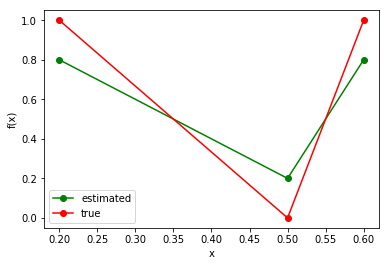

In [29]:
plotModel(x,y,yd)

# EXPERIMENTS
## Could you train it?
Using the above functions:
- Generate 20 training points
- Train your linear model using x and yd
- Predict y (using the linear model you found above) for the training data x
- Compare y with yd to find the mean-squared error 

In [0]:
def trainModel(N, D):
    '''
    Inputs:
        N: number of samples
        D: degree of the model
    Outputs:
        x: np array of size (N,)
        y: np array of size (N,)
        yd: np array of size (N,)
        w: np array of size (D+1,)
        mse: scalar float
    '''
    
    # YOUR CODE HERE
    
    
    x,yd = generateX_fx(20)
    A = createA(x,D)
    w = train_w(A, yd)
    y = A.dot(w)
    mse = compute_mse(y, yd)
    
    return x, y, yd, w, mse

## Could you test it on new (test) points?
Using the above functions:
- Generate 30 test points
- Estimate y using the linear model w you found above. Do NOT train again
- Compare y with yd to find the mean-squared error <br />

In [31]:
'''testing'''
def test_trainModel():
    N = 20
    D = 2
    x, y, yd, w, mse = trainModel(N,D)
    assert x.shape[0]==20
    assert w.shape[0]==D+1
    print(w)
    print('MSE on train data = ', mse)
#     plotModel(x,y,yd)
    print('Test passed', '\U0001F44D')
test_trainModel()

[ 1.00930501 -0.35270419  0.00649348]
MSE on train data =  0.2
Test passed 👍


In [0]:
def testModel(Ntest, w):
    '''
    Inputs:
        Ntest: number of test samples to be generated
        w: np array of size (D+1,)
    Outputs:
        x: np array of size (N,)
        y: np array of size (N,)
        yd: np array of size (N,)
        mse: scalar float
    '''
    # YOUR CODE HERE
    f = w
    D = len(f)-1
    x,yd = generateX_fx(20)
    A = createA(x,D)
    w = train_w(A, yd)
    y = A.dot(w)
    mse = compute_mse(y, yd)
    
    w = f
    
    return x, y, yd, mse

[ 2.69570351e-01  7.97391891e-01  7.27081299e-02 -1.91345215e-01
  1.09786987e-02  3.17764282e-03  1.86491013e-03 -6.52074814e-04
  6.85453415e-05 -2.53226608e-06  6.66477717e-09]
MSE on train data =  0.0
MSE on test data =  0.0
Test passed 👍


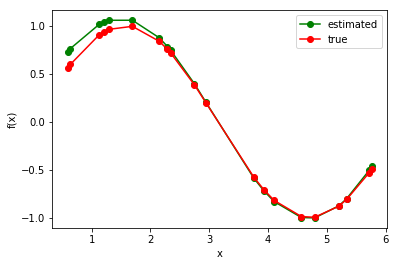

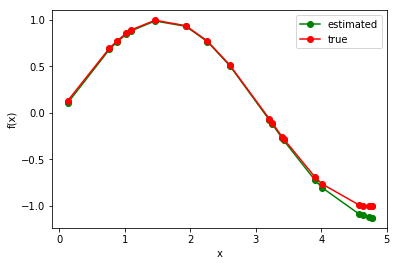

In [50]:
'''Testing'''
def test_testModel():
    N = 30
    D = 10
    x, y, yd, w, mse = trainModel(N,D)
    #assert x.shape[0]==N
    #assert w.shape[0]==D+1
    print(w)
    print('MSE on train data = ', mse)
    plotModel(x,y,yd)
    Ntest = 50
    x, y, yd, mse = testModel(Ntest,w)
    print('MSE on test data = ', mse)
    plotModel(x,y,yd)
    print('Test passed', '\U0001F44D')
test_testModel()

# ADVANCED

## Does the performance improve with increasing the number of training points?
- Repeat the training with different no. of samples. Take N=3, 5, 10, 30; and D=5
- Plot training error vs N
- Plot test error vs N

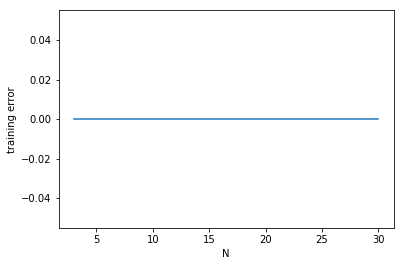

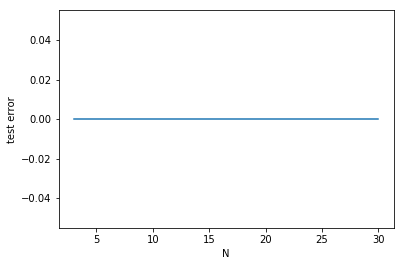

In [62]:
D = 5
x,y,yd,w,mse1 = trainModel(3,D)
x,y,yd,m1 = testModel(3,w)
x,y,yd,w,mse2 = trainModel(5,D)
x,y,yd,m2 = testModel(5,w)
x,y,yd,w,mse3 = trainModel(10,D)
x,y,yd,m3 = testModel(10,w)
x,y,yd,w,mse4 = trainModel(30,D)
x,y,yd,m4 = testModel(30,w)
t =np.array([3,5,10,30])
mse0 = np.array([mse1,mse2,mse3,mse4])
m0 = np.array([m1,m2,m3,m4])
def plotModel1(t,mse0):
  import matplotlib.pyplot as plt
  i = t.argsort()
  plt.figure()
  plt.plot(t[i],mse0[i])
  plt.ylabel('training error')
  plt.xlabel('N')
def plotModel2(t,mse0):
  import matplotlib.pyplot as plt
  i = t.argsort()
  plt.figure()
  plt.plot(t[i],mse0[i])
  plt.ylabel('test error')
  plt.xlabel('N')   
plotModel1(t,mse0)
plotModel2(t,m0)


## Does the performance improve with increasing the degree D of the model?
- Repeat the training with different degree models. Take D=0, 1, 2, 4, 7, 12, and N=10
- Plot training error vs D
- Plot test error vs D
- Plot y vs x for each D

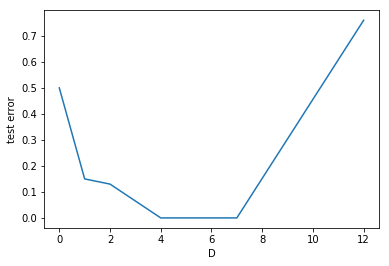

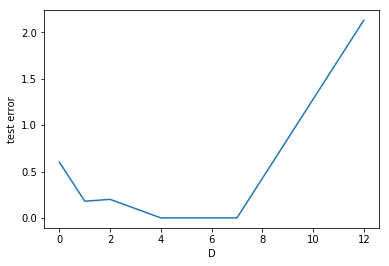

In [63]:
x,y,yd,w,mse1 = trainModel(10,0)
x,y,yd,m1 = testModel(10,w)
x,y,yd,w,mse2 = trainModel(10,1)
x,y,yd,m2 = testModel(10,w)
x,y,yd,w,mse3 = trainModel(10,2)
x,y,yd,m3 = testModel(10,w)
x,y,yd,w,mse4 = trainModel(10,4)
x,y,yd,m4 = testModel(10,w)
x,y,yd,w,mse5 = trainModel(10,7)
x,y,yd,m5 = testModel(10,w)
x,y,yd,w,mse6 = trainModel(10,12)
x,y,yd,m6 = testModel(10,w)

t =np.array([0,1,2,4,7,12])
mse0 = np.array([mse1,mse2,mse3,mse4,mse5,mse6])
m0 = np.array([m1,m2,m3,m4,m5,m6])
def plotModel1(t,mse0):
  import matplotlib.pyplot as plt
  i = t.argsort()
  plt.figure()
  plt.plot(t[i],mse0[i])
  plt.ylabel('training error')
  plt.xlabel('D')
def plotModel1(t,mse0):
  import matplotlib.pyplot as plt
  i = t.argsort()
  plt.figure()
  plt.plot(t[i],mse0[i])
  plt.ylabel('test error')
  plt.xlabel('D')   
plotModel1(t,mse0)
plotModel1(t,m0)
